In [1]:
import sys
sys.path.append("../ml_models/")

import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from knn import KNearestNeighbor

%load_ext autoreload
%autoreload 2

In [2]:
X, y = make_regression(n_samples=40, n_features=1, noise=28, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.8165205325900613


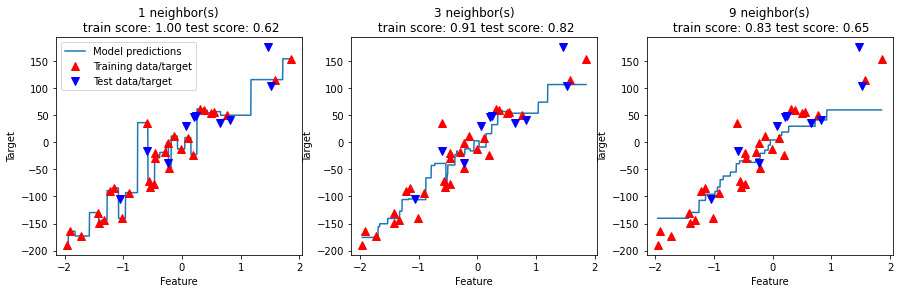

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c="r", markersize=8)
    ax.plot(X_test, y_test, 'v', c="b", markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

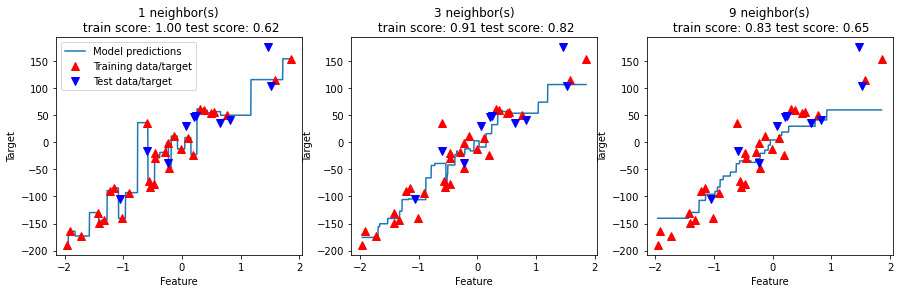

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNearestNeighbor(k=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c="r", markersize=8)
    ax.plot(X_test, y_test, 'v', c="b", markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

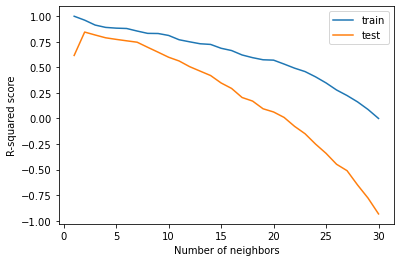

In [5]:
train_scores = []
test_scores = []
for n_neighbors in range(1, len(y_train) + 1):
    reg = KNearestNeighbor(k=n_neighbors)
    reg.fit(X_train, y_train)
    train_scores.append(reg.score(X_train, y_train))
    test_scores.append(reg.score(X_test, y_test))
plt.plot(range(1, len(y_train) + 1), train_scores, label="train")
plt.plot(range(1, len(y_train) + 1), test_scores, label="test")
plt.xlabel("Number of neighbors")
plt.ylabel("R-squared score")
plt.legend()
plt.show()